In [146]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [147]:
np.random.seed(0)

In [148]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [149]:
X_train.shape

(60000, 28, 28)

In [150]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [151]:
y_train.shape

(60000,)

In [152]:
assert(X_train.shape[0] == y_train.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_test.shape[0] == y_test.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_train.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"
assert(X_test.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


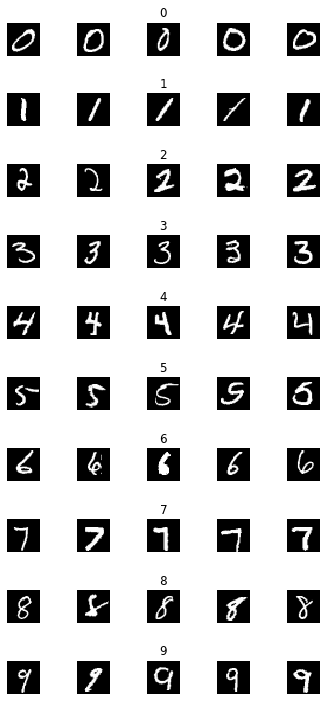

In [153]:
num_of_samples = []
cols = 5
num_class = 10
fig,axes = plt.subplots(nrows=num_class, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_class):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap='gray')
        axes[j][i].axis("off")
        if i== 2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            print(x_selected.shape)

Text(0, 0.5, 'Number of image')

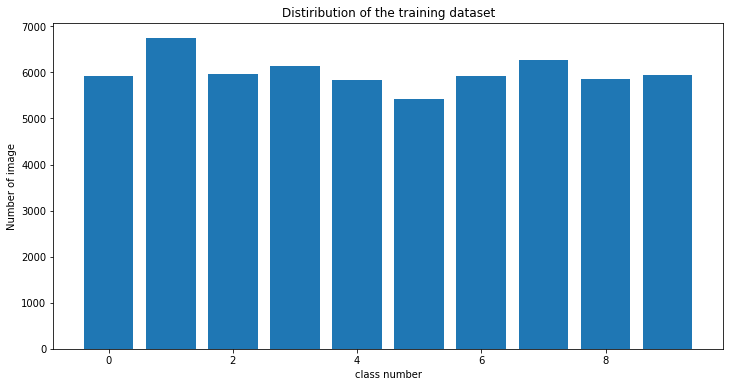

In [154]:
num_of_samples
plt.figure(figsize=(12,6))
plt.bar(range(0,10),num_of_samples)
plt.title('Distiribution of the training dataset')
plt.xlabel("class number")
plt.ylabel("Number of image")

In [155]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [156]:
X_train = X_train/255
X_test = X_test/255

In [157]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1)

In [181]:
X_train_flatten.shape

(60000, 784)

In [158]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)

In [159]:
X_train = X_train_flatten
X_test = X_test_flatten

In [160]:
def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [161]:
model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_15 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 11us/sample - loss: 0.3630 - accuracy: 0.8902 - val_loss: 0.1749 - val_accuracy: 0.9503
Epoch 2/10
54000/54000 [==============================] - 0s 8us/sample - loss: 0.1816 - accuracy: 0.9468 - val_loss: 0.1355 - val_accuracy: 0.9597
Epoch 3/10
54000/54000 [==============================] - 0s 6us/sample - loss: 0.1409 - accuracy: 0.9580 - val_loss: 0.1476 - val_accuracy: 0.9570
Epoch 4/10
54000/54000 [==============================] - 0s 7us/sample - loss: 0.1299 - accuracy: 0.9601 - val_loss: 0.1265 - val_accuracy: 0.9625
Epoch 5/10
54000/54000 [==============================] - 0s 7us/sample - loss: 0.1122 - accuracy: 0.9662 - val_loss: 0.1205 - val_accuracy: 0.9662
Epoch 6/10
54000/54000 [==============================] - 0s 6us/sample - loss: 0.1063 - accuracy: 0.9670 - val_loss: 0.1084 - val_accuracy: 0.9707
Epoch 7/10
54000/54000 [==============================] - 0s 7

In [163]:
import pandas as pd

In [164]:
df = pd.DataFrame(model.history.history)

In [165]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.363015,0.890204,0.174886,0.950333
1,0.181551,0.946796,0.135481,0.959667
2,0.140919,0.957981,0.147643,0.957000
3,0.129881,0.960074,0.126458,0.962500
4,0.112217,0.966241,0.120452,0.966167
5,0.106306,0.967000,0.108353,0.970667
6,0.099759,0.969093,0.119332,0.965167
7,0.095205,0.970315,0.147054,0.960500
8,0.091864,0.971148,0.116012,0.966667
9,0.083298,0.974278,0.125870,0.964667


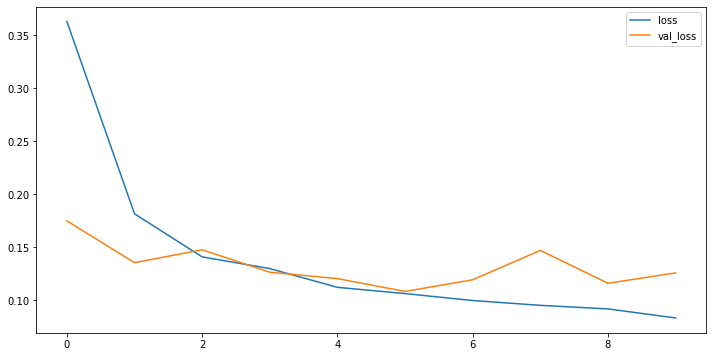

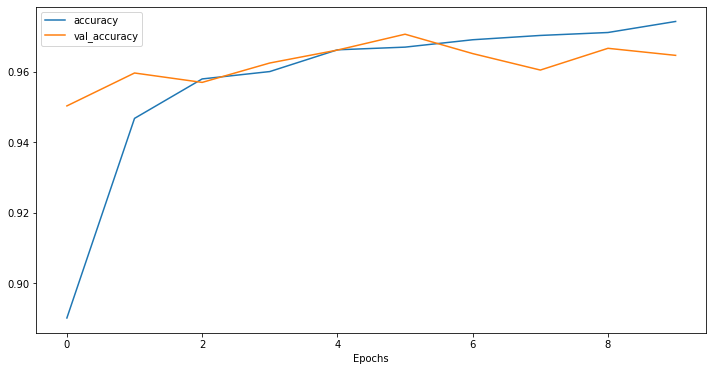

In [166]:
df[['loss','val_loss']].plot(figsize=(12,6))
df[['accuracy','val_accuracy']].plot(figsize=(12,6))
plt.xlabel('Epochs')
plt.legend()

In [167]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))

<class 'list'>


In [168]:
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.1690588955843821
Test accuracy:  0.954


In [169]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)

In [170]:
image = Image.open(response.raw)



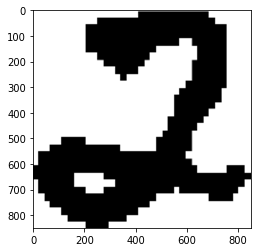

In [171]:
plt.imshow(image)

In [172]:
import cv2

image_array = np.asarray(image)

In [173]:
image_array.shape

(850, 850, 4)

In [174]:
resized = cv2.resize(image_array,(28,28)) # 28*28 크기이므로바꿔줘야함
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

In [175]:
image = cv2.bitwise_not(gray_scale) #우리가 학습시킨건 숫자가 흰색 배경이 검정이므로 바꿔줘야함

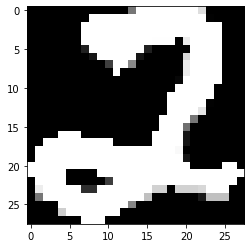

In [176]:
plt.imshow(image,cmap='gray')

In [177]:
image = image*255

In [178]:
image = image.reshape(1,-1)

In [179]:
prediction = model.predict_classes(image)

In [180]:
prediction

array([3])